# Pregunta 2

Crea un repositorio publico en `github.com` de nombre `cap199_preg2_mod2`.
En este repositorio se deben realizar 4 push, uno para cada una de las soluciones (implementadas en python) de los siguientes items:

## **a.**

Visualiza la función $seno$ junto con varias rectas tangentes en diferentes puntos (`0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2`). El resultado debe ser practicamente al que a continuacion muestro.

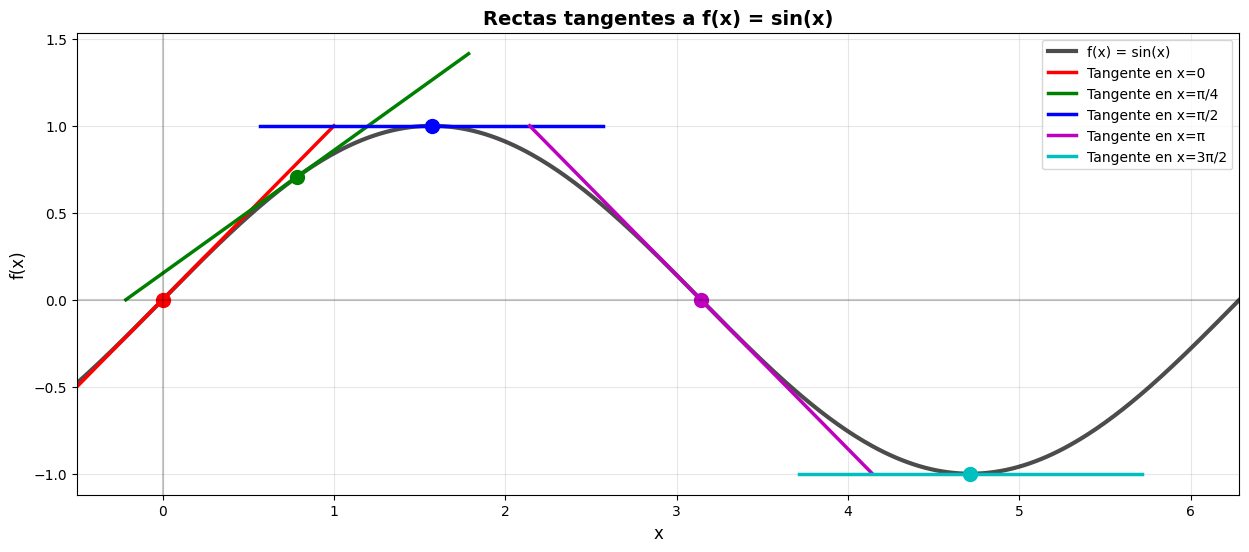

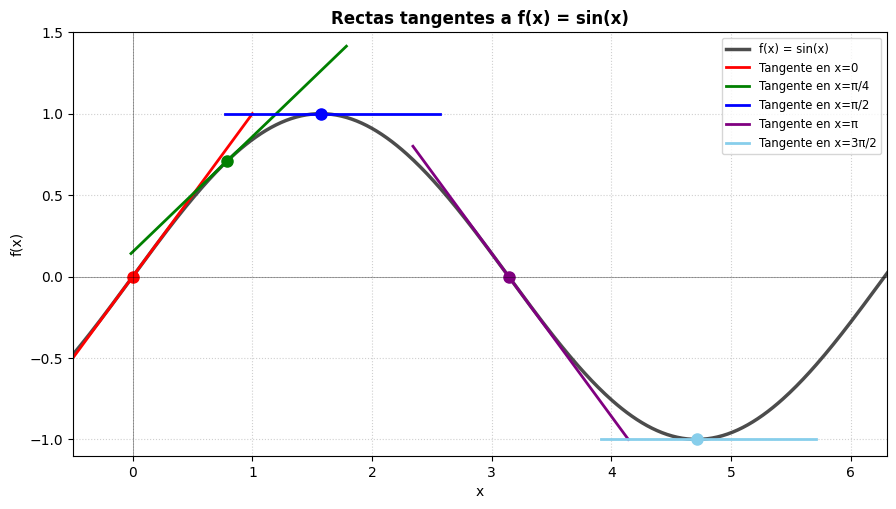

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función y derivada
def f(x):
    return np.sin(x)
def df(x):
    return np.cos(x)

# Puntos de tangencia y dominio
x = np.linspace(-0.5, 6.5, 500)
puntos_tangencia = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2]
colores = ['red', 'green', 'blue', 'purple', 'skyblue']
etiquetas = ['x=0', 'x=π/4', 'x=π/2', 'x=π', 'x=3π/2']

# Creación de la figura
plt.figure(figsize=(10.5, 5.5))

# Grafico de la función seno principal
plt.plot(x, f(x), color='black', linewidth=2.5, alpha=0.7, label='f(x) = sin(x)')

# Cálculo y gráfico de cada recta tangente
for pt, col, etiq in zip(puntos_tangencia, colores, etiquetas):
    # Punto de tangencia (x0, y0)
    x0 = pt
    y0 = f(x0)
    m = df(x0) # Pendiente

    # Definición de intervalo local para la recta tangente
    x_tan = np.linspace(x0 - 0.8, x0 + 1, 100)
    y_tan = m * (x_tan - x0) + y0

    # Gráfico de la recta y el punto de tangencia
    plt.plot(x_tan, y_tan, color=col, linewidth=2, label=f'Tangente en {etiq}')
    plt.plot(x0, y0, marker='o', color=col, markersize=8)

# Visualización
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='black', linewidth=0.5, alpha=0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(-0.5, 6.3)
plt.ylim(-1.1, 1.5)

plt.title('Rectas tangentes a f(x) = sin(x)', fontweight='bold')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(fontsize='small', loc='upper right')

plt.show()

## **b.**

Dataset : https://github.com/robintux/Datasets4StackOverFlowQuestions/blob/master/Cancer_Pulmon.zip

Cargar el dataset en memoria : Usar como nombre de variable : `df`



## **c.**

Con la variable `df` del item **b.** genere el siguiente grafico:

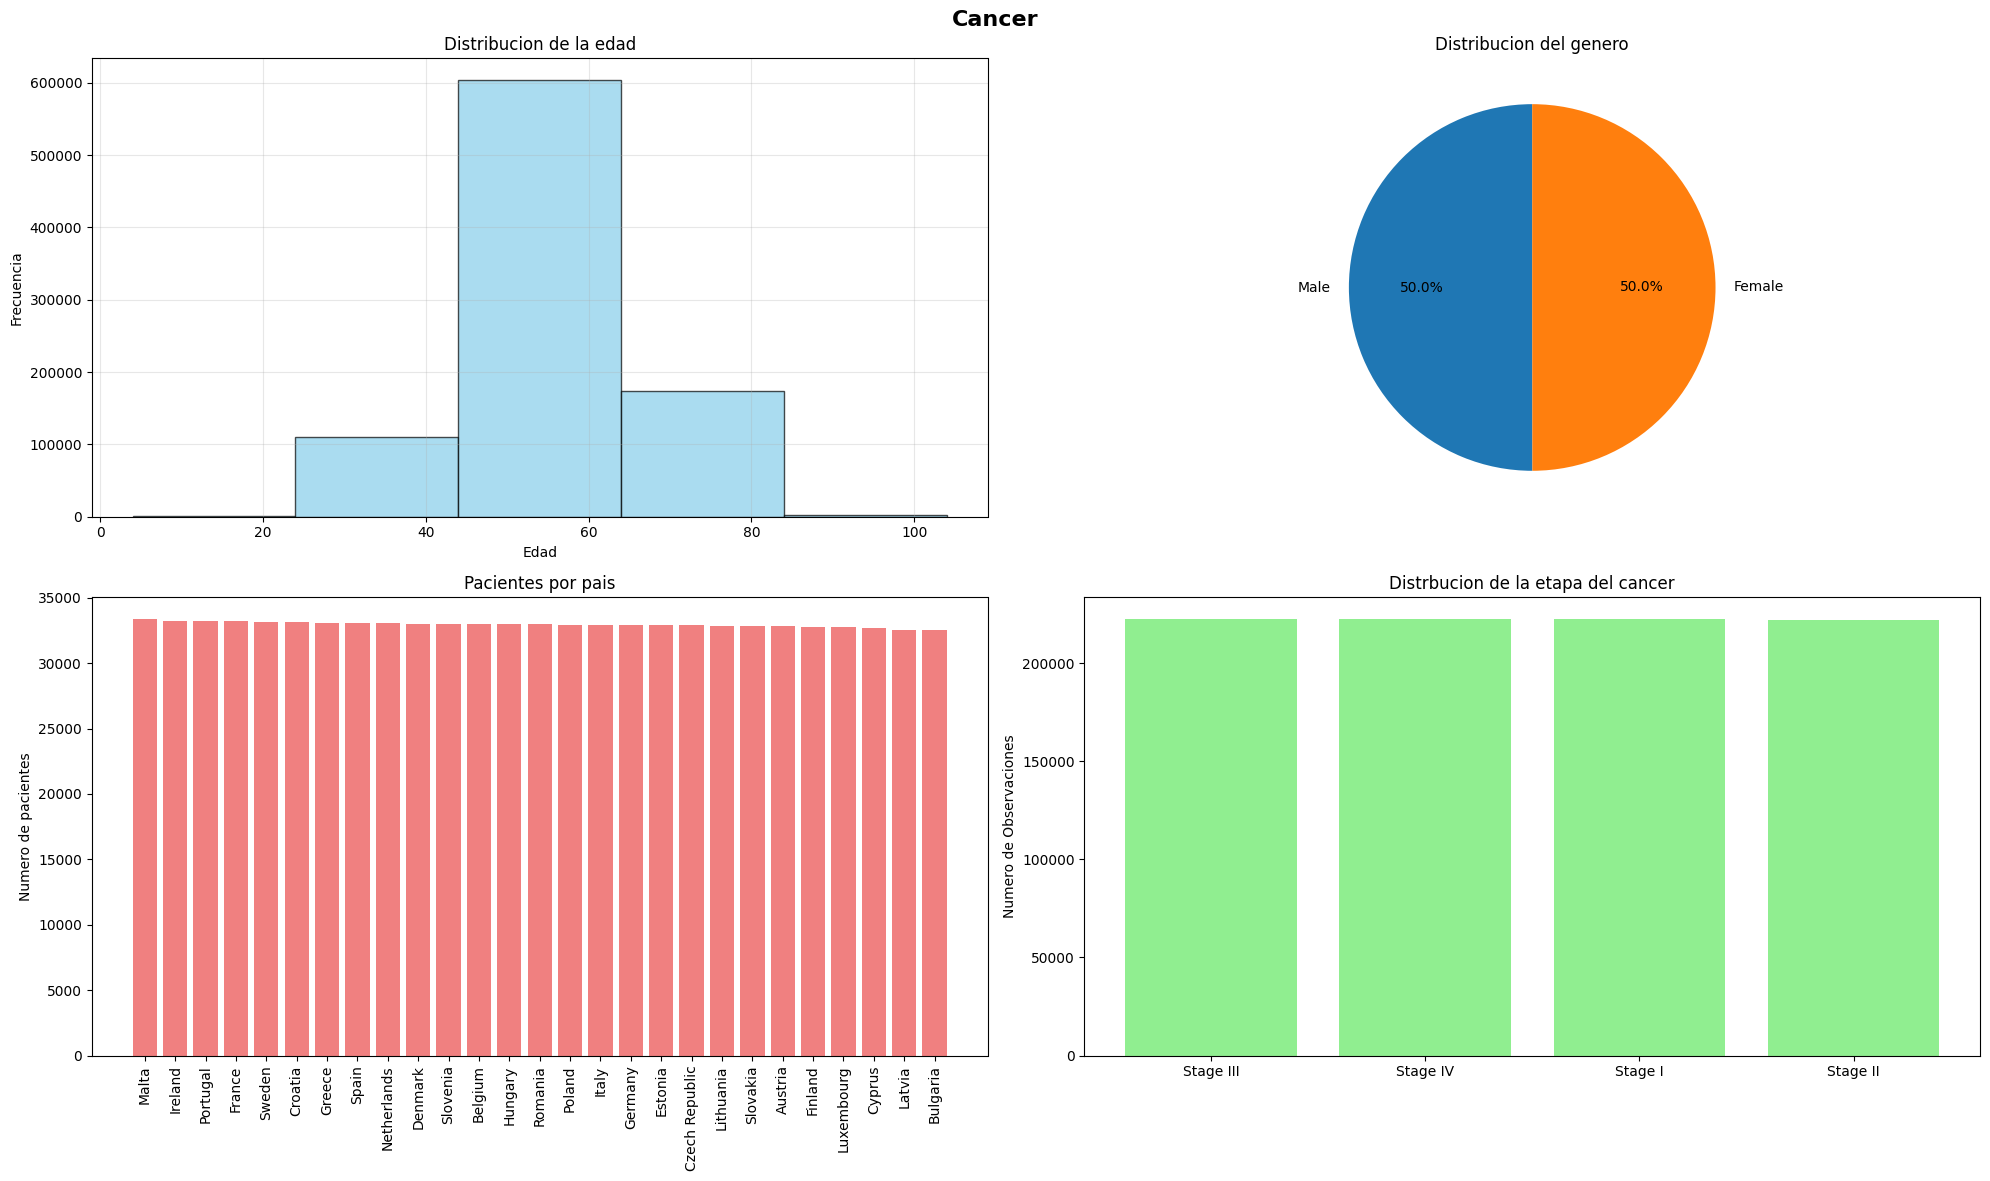

## **d.**

Con la variable `df` del item **b.** genere un boxplot para cada una de las siguientes variables:

* `age`
* `bmi`
* `cholesterol_level`